Variância explicada por cada componente principal: [0.36198848 0.1920749 ]


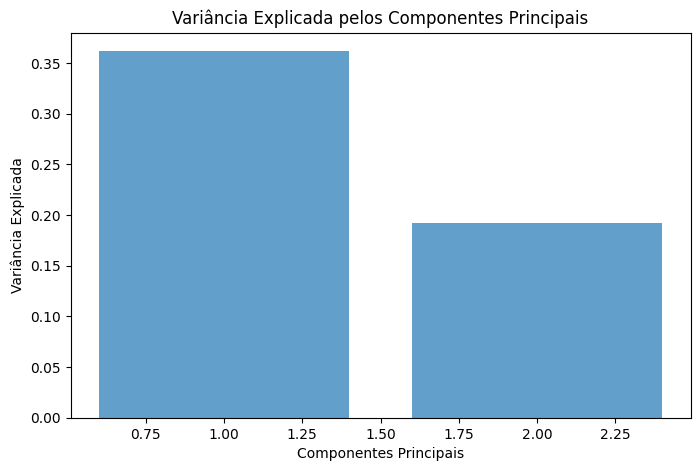


Cargas dos componentes principais:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1  0.483652    0.224931  0.316069          -0.010591   0.299634   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.394661    0.422934             -0.298533         0.313429   
1       0.065040   -0.003360              0.028779         0.039302   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.088617  0.296715                      0.376167  0.286752  
1         0.529996 -0.279235                     -0.164496  0.364903  


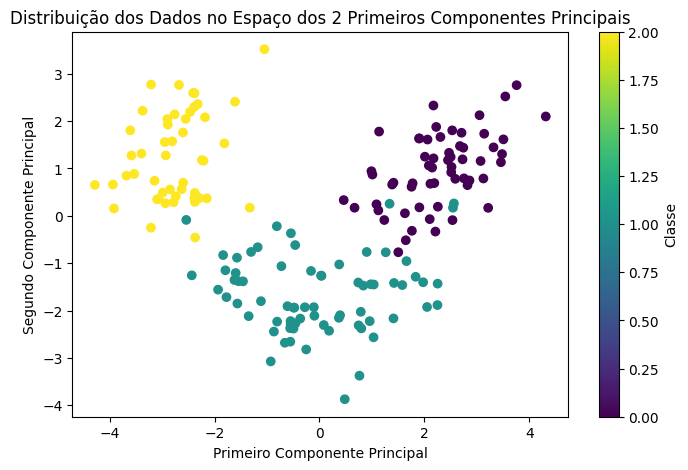

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais para visualização
X_pca = pca.fit_transform(X_scaled)

# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por cada componente principal: {explained_variance}")

# Gráfico de Variância Explicada
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada pelos Componentes Principais')
plt.show()

# Analisando as cargas dos componentes principais (carga dos componentes nas variáveis originais)
components_df = pd.DataFrame(pca.components_, columns=feature_names)
print("\nCargas dos componentes principais:")
print(components_df)

# Gráfico de dispersão dos dados ao longo dos 2 primeiros componentes principais
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Distribuição dos Dados no Espaço dos 2 Primeiros Componentes Principais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(label='Classe')
plt.show()
